In [2]:
# Повторная загрузка данных после сброса окружения
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np




In [3]:
# Загрузка данных
df_vuz = pd.read_csv('../../data/tabiturient/processed_data/vuz_all_cleaned_w_obsh.csv')
df_programs = pd.read_csv('../../data/tabiturient/processed_data/programs_cleaned.csv')

# Объединение данных
merged_df = df_programs.merge(df_vuz, left_on='vuz', right_on='long_name', how='left')

# Проверим успешность объединения
merged_df.head()

,direction,profile,program_code,vuz_x,faculty,exams,scores,forms,long_name,short_name,...,website,phone_admission,phone_general,email_general,email_admission,comment,vuz_y,obsh,info,rating.1
0,Биология,Охотоведение,06.03.01,Арктический государственный агротехнологически...,Факультет ветеринарной медицины,"[['РЯ'], ['Б'], ['M', 'ИКТ']]","[['139', 'очно']]","[{'education_form2': 'Очная', 'score': '139', ...",Арктический государственный агротехнологически...,АГАТУ,...,http://www.agatu.ru/,['+7 (967) 912-65-61'],[],['info@agatu.ru'],"['abiturient@agatu.ru', 'info@agatu.ru']",NaN,АГАТУ,True,"\r\nВероятно, общежитие в этом вузе дают не вс...",1.95
1,Информационные системы и технологии,Управление аграрными проектами в области инфор...,09.03.02,Арктический государственный агротехнологически...,Инженерный факультет,"[['РЯ'], ['M'], ['ИЯ', 'ИКТ']]","[['162', 'очно']]","[{'education_form2': 'Очная', 'score': '162', ...",Арктический государственный агротехнологически...,АГАТУ,...,http://www.agatu.ru/,['+7 (967) 912-65-61'],[],['info@agatu.ru'],"['abiturient@agatu.ru', 'info@agatu.ru']",NaN,АГАТУ,True,"\r\nВероятно, общежитие в этом вузе дают не вс...",1.95
2,Теплоэнергетика и теплотехника,Энергетика теплотехнологии,13.03.01,Арктический государственный агротехнологически...,Инженерный факультет,"[['РЯ'], ['M'], ['ИКТ', 'Ф']]",[],"[{'education_form2': 'Очная', 'score': 'Только...",Арктический государственный агротехнологически...,АГАТУ,...,http://www.agatu.ru/,['+7 (967) 912-65-61'],[],['info@agatu.ru'],"['abiturient@agatu.ru', 'info@agatu.ru']",NaN,АГАТУ,True,"\r\nВероятно, общежитие в этом вузе дают не вс...",1.95
3,Электроэнергетика и электротехника,Электрооборудование и электрохозяйство предпри...,13.03.02,Арктический государственный агротехнологически...,Инженерный факультет,"[['РЯ'], ['M'], ['ИКТ', 'Ф']]",[],"[{'education_form2': 'Очная', 'score': 'Только...",Арктический государственный агротехнологически...,АГАТУ,...,http://www.agatu.ru/,['+7 (967) 912-65-61'],[],['info@agatu.ru'],"['abiturient@agatu.ru', 'info@agatu.ru']",NaN,АГАТУ,True,"\r\nВероятно, общежитие в этом вузе дают не вс...",1.95
4,Технологические машины и оборудование,Машины и аппараты пищевых производств,15.03.02,Арктический государственный агротехнологически...,Инженерный факультет,"[['РЯ'], ['M'], ['ИКТ', 'Ф']]",[],"[{'education_form2': 'Очная', 'score': 'Только...",Арктический государственный агротехнологически...,АГАТУ,...,http://www.agatu.ru/,['+7 (967) 912-65-61'],[],['info@agatu.ru'],"['abiturient@agatu.ru', 'info@agatu.ru']",NaN,АГАТУ,True,"\r\nВероятно, общежитие в этом вузе дают не вс...",1.95


<>:9: SyntaxWarning: invalid escape sequence '\d'
<>:9: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_509723/2859541440.py:9: SyntaxWarning: invalid escape sequence '\d'
  merged_df['scores_numeric'] = pd.to_numeric(merged_df['scores'].str.extract('(\d+)')[0], errors='coerce')


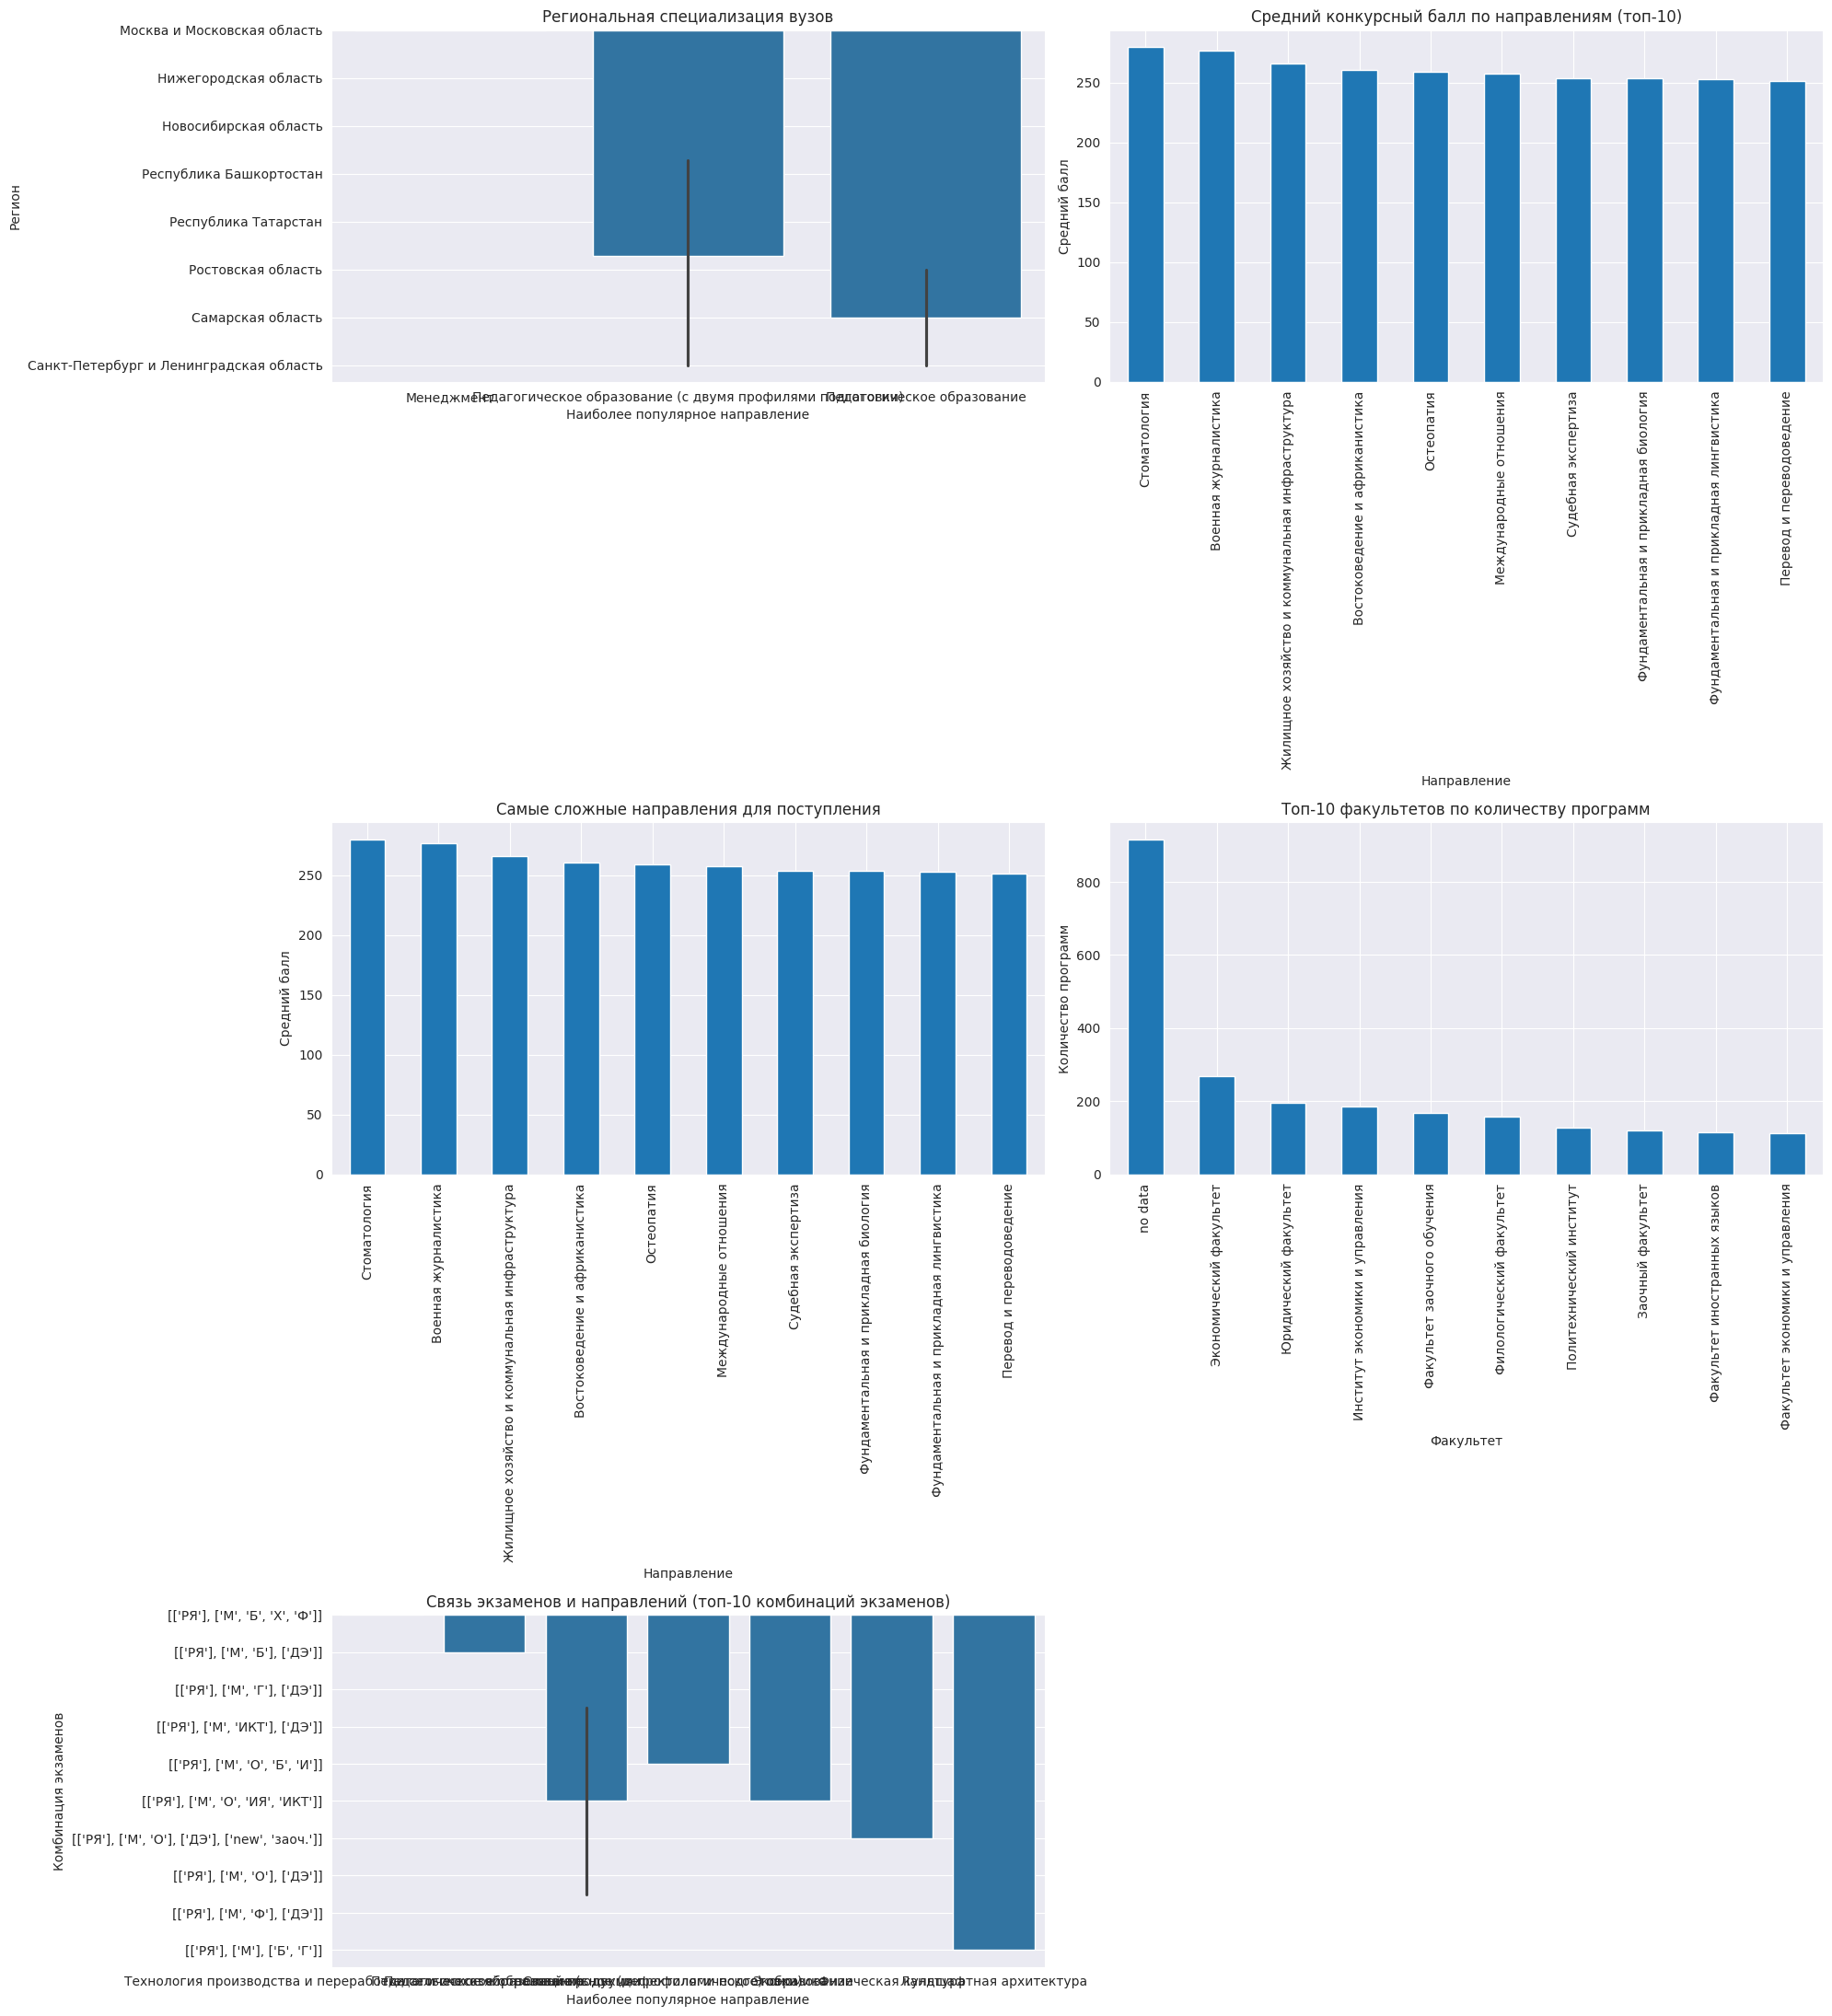

In [4]:
# Подготовка и визуализация комплексной аналитики

# 1. Региональная специализация вузов (топ-10 регионов по числу программ)
top_regions = merged_df['geolocation'].value_counts().head(10).index
regional_specialization = merged_df[merged_df['geolocation'].isin(top_regions)]
regional_specialization = regional_specialization.groupby('geolocation')['direction'].agg(lambda x: x.mode().iloc[0])

# 2. Анализ конкурсных баллов по направлениям (только с числовыми баллами)
merged_df['scores_numeric'] = pd.to_numeric(merged_df['scores'].str.extract('(\d+)')[0], errors='coerce')
direction_scores = merged_df.groupby('direction')['scores_numeric'].agg(['mean', 'min', 'max']).dropna().sort_values(by='mean', ascending=False).head(10)

# 3. Сложность поступления (средний конкурсный балл)
difficulty_of_admission = direction_scores['mean']

# 4. Популярность факультетов (топ-10)
faculty_popularity = merged_df['faculty'].value_counts().head(10)

# 5. Связь экзаменов и направлений (топ-10 комбинаций экзаменов)
exam_direction_corr = merged_df.groupby('exams')['direction'].agg(lambda x: x.mode().iloc[0]).head(10)

# Визуализация
fig, axs = plt.subplots(3, 2, figsize=(20, 22))

# Региональная специализация
sns.barplot(y=regional_specialization.index, x=regional_specialization.values, ax=axs[0, 0])
axs[0, 0].set_title('Региональная специализация вузов')
axs[0, 0].set_xlabel('Наиболее популярное направление')
axs[0, 0].set_ylabel('Регион')

# Средний конкурсный балл по направлениям
difficulty_of_admission.plot(kind='bar', ax=axs[0, 1])
axs[0, 1].set_title('Средний конкурсный балл по направлениям (топ-10)')
axs[0, 1].set_xlabel('Направление')
axs[0, 1].set_ylabel('Средний балл')

# Самые сложные направления для поступления
difficulty_of_admission.plot(kind='bar', ax=axs[1, 0])
axs[1, 0].set_title('Самые сложные направления для поступления')
axs[1, 0].set_xlabel('Направление')
axs[1, 0].set_ylabel('Средний балл')

# Популярность факультетов
faculty_popularity.plot(kind='bar', ax=axs[1, 1])
axs[1, 1].set_title('Топ-10 факультетов по количеству программ')
axs[1, 1].set_xlabel('Факультет')
axs[1, 1].set_ylabel('Количество программ')

# Связь экзаменов и направлений подготовки
sns.barplot(y=exam_direction_corr.index, x=exam_direction_corr.values, ax=axs[2, 0])
axs[2, 0].set_title('Связь экзаменов и направлений (топ-10 комбинаций экзаменов)')
axs[2, 0].set_xlabel('Наиболее популярное направление')
axs[2, 0].set_ylabel('Комбинация экзаменов')

# Отключаем лишнюю ячейку
axs[2, 1].axis('off')

plt.tight_layout()
plt.show()


<>:8: SyntaxWarning: invalid escape sequence '\d'
<>:8: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_509723/1979476776.py:8: SyntaxWarning: invalid escape sequence '\d'
  merged_df['scores_numeric'] = pd.to_numeric(merged_df['scores'].str.extract('(\d+)')[0], errors='coerce')


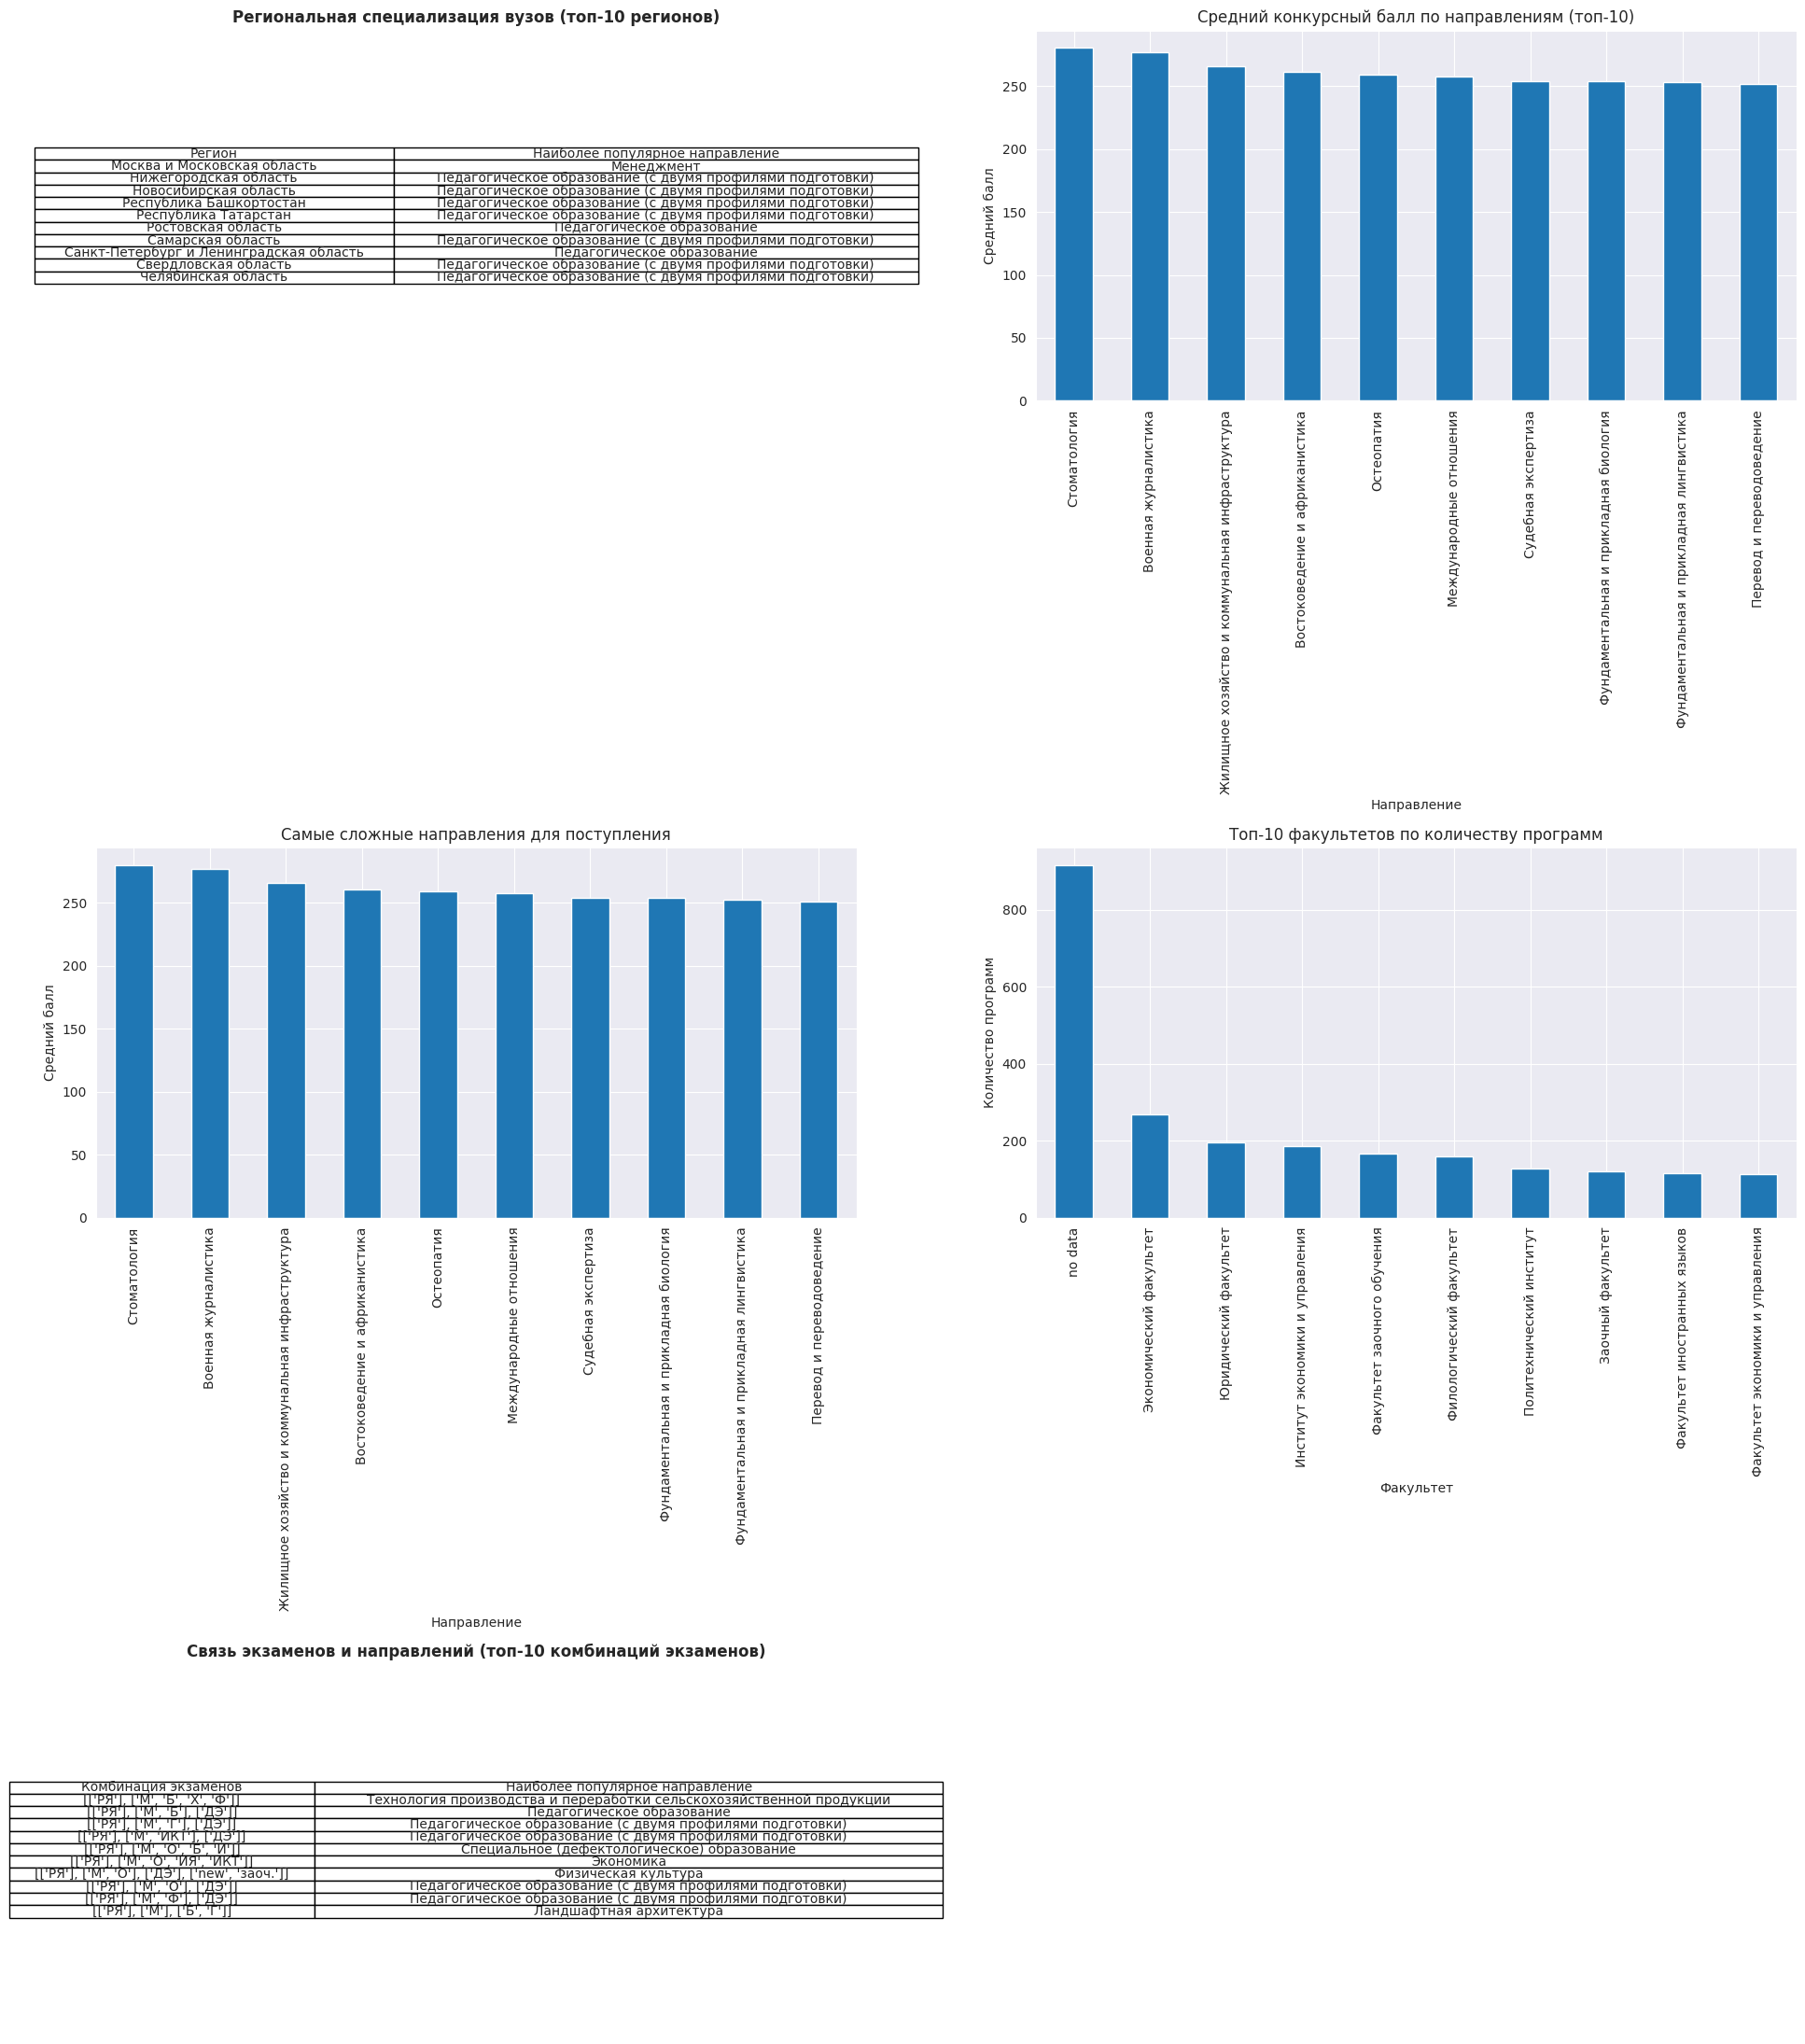

In [5]:
# Исправление и корректная аналитика
# 1. Региональная специализация вузов (топ-10 регионов по количеству программ)
top_regions = merged_df['geolocation'].value_counts().head(10).index
regional_specialization = merged_df[merged_df['geolocation'].isin(top_regions)]
regional_specialization = regional_specialization.groupby('geolocation')['direction'].agg(lambda x: x.mode().iloc[0])

# Конкурсные баллы по направлениям (только программы с баллами)
merged_df['scores_numeric'] = pd.to_numeric(merged_df['scores'].str.extract('(\d+)')[0], errors='coerce')
direction_scores = merged_df.groupby('direction')['scores_numeric'].agg(['mean', 'min', 'max']).dropna().sort_values(by='mean', ascending=False).head(10)

# Сложность поступления
difficulty_of_admission = direction_scores['mean']

# Популярность факультетов
faculty_popularity = merged_df['faculty'].value_counts().head(10)

# Связь экзаменов и направлений (топ-10 комбинаций)
exam_direction_corr = merged_df.groupby('exams')['direction'].agg(lambda x: x.mode().iloc[0]).head(10)

# Визуализация с корректировками
fig, axs = plt.subplots(3, 2, figsize=(20, 22))

# Региональная специализация (текстовая информация)
axs[0, 0].axis('off')
table = axs[0, 0].table(cellText=regional_specialization.reset_index().values,
                        colLabels=['Регион', 'Наиболее популярное направление'],
                        cellLoc='center',
                        loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width([0, 1])
axs[0, 0].set_title('Региональная специализация вузов (топ-10 регионов)', fontweight='bold')

# Конкурсные баллы по направлениям (средний балл)
difficulty_of_admission.plot(kind='bar', ax=axs[0, 1])
axs[0, 1].set_title('Средний конкурсный балл по направлениям (топ-10)')
axs[0, 1].set_xlabel('Направление')
axs[0, 1].set_ylabel('Средний балл')

# Самые сложные направления для поступления
difficulty_of_admission.plot(kind='bar', ax=axs[1, 0])
axs[1, 0].set_title('Самые сложные направления для поступления')
axs[1, 0].set_xlabel('Направление')
axs[1, 0].set_ylabel('Средний балл')

# Популярность факультетов
faculty_popularity.plot(kind='bar', ax=axs[1, 1])
axs[1, 1].set_title('Топ-10 факультетов по количеству программ')
axs[1, 1].set_xlabel('Факультет')
axs[1, 1].set_ylabel('Количество программ')

# Связь экзаменов и направлений подготовки
axs[2, 0].axis('off')
table2 = axs[2, 0].table(cellText=exam_direction_corr.reset_index().values,
                        colLabels=['Комбинация экзаменов', 'Наиболее популярное направление'],
                        cellLoc='center',
                        loc='center')
table2.auto_set_font_size(False)
table2.set_fontsize(10)
table2.auto_set_column_width([0, 1])
axs[2, 0].set_title('Связь экзаменов и направлений (топ-10 комбинаций экзаменов)', fontweight='bold')

# Уберем лишнюю ячейку
axs[2, 1].axis('off')

plt.tight_layout()
plt.show()
